## Tratamento das bases
- Analise realizada a partir das bases de inscriçoes de 2016 até 2023
- Para os dados de localizaçao e UF, estou considerando somente as incriçoes com dados de CEP validados
- A coluna de idioma está considerando o nome da planilha em que o dados estava armazenado
- Coluna arquivo contém o caminho do arquivo na pasta de incriçao
- Dados sem informaçao de data_inscricao vao ser desconsiderados (aproximadamente 272 registros)

In [30]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel("inscricoes_2016-2023.xlsx")
df['data_inscricao'] = pd.to_datetime(df['data_inscricao'],errors='coerce')
df_mask = df["data_inscricao"].notna()
filtered_df = df[df_mask]

idiomas = ['Lemerig','Poyanawa ','Ongota','Amanayé']


evolucao_ano =  filtered_df[['idioma','data_inscricao','foi_pago']]
evolucao_ano['ano_inscricao'] = evolucao_ano['data_inscricao'].dt.strftime('%Y')

agg_pagas = evolucao_ano[evolucao_ano['foi_pago'] == 'Sim'].groupby('ano_inscricao')['foi_pago'].count()
agg_total = evolucao_ano.groupby('ano_inscricao')['foi_pago'].count()
percentual_pagas = (agg_pagas / agg_total) * 100

agg_volume = evolucao_ano.groupby('ano_inscricao')['ano_inscricao'].sum()

anos = evolucao_ano['ano_inscricao'].sort_values().unique()

## Taxa de Conversão de Inscritos para Pagantes
Nesta análise, calcularemos a taxa de conversão, ou seja, a porcentagem de inscritos que se tornaram alunos pagantes. Isso nos ajudará a entender o sucesso de nossa captação de alunos.

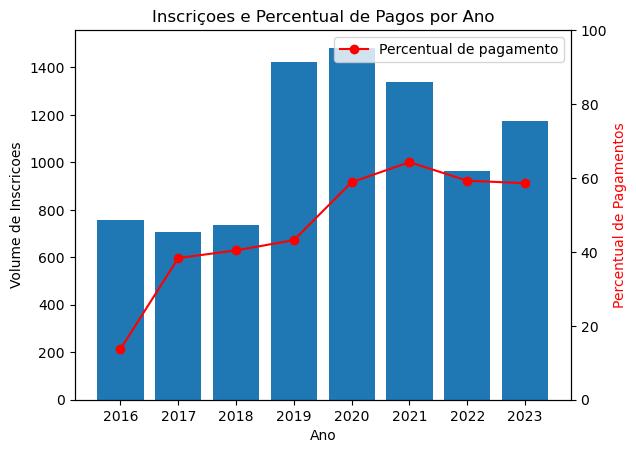

In [31]:

x_linha = np.arange(len(anos))
y_linha = percentual_pagas


fig, ax1 = plt.subplots()
plt.bar(anos,agg_total)

ax2 = ax1.twinx()
ax2.plot(x_linha, y_linha, marker='o', linestyle='-', color='r', label='Percentual de pagamento')
ax2.set_ylim(0, 100)

# Definir rótulos e título
ax1.set_xlabel('Ano')
ax1.set_ylabel('Volume de Inscricoes')
ax2.set_ylabel('Percentual de Pagamentos', color='r')
plt.title('Inscriçoes e Percentual de Pagos por Ano')

# Adicionar legenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

# Exibir o gráfico
plt.show()

## Gráfico mostrando evolução nas inscrições e matrículas ao longo dos anos

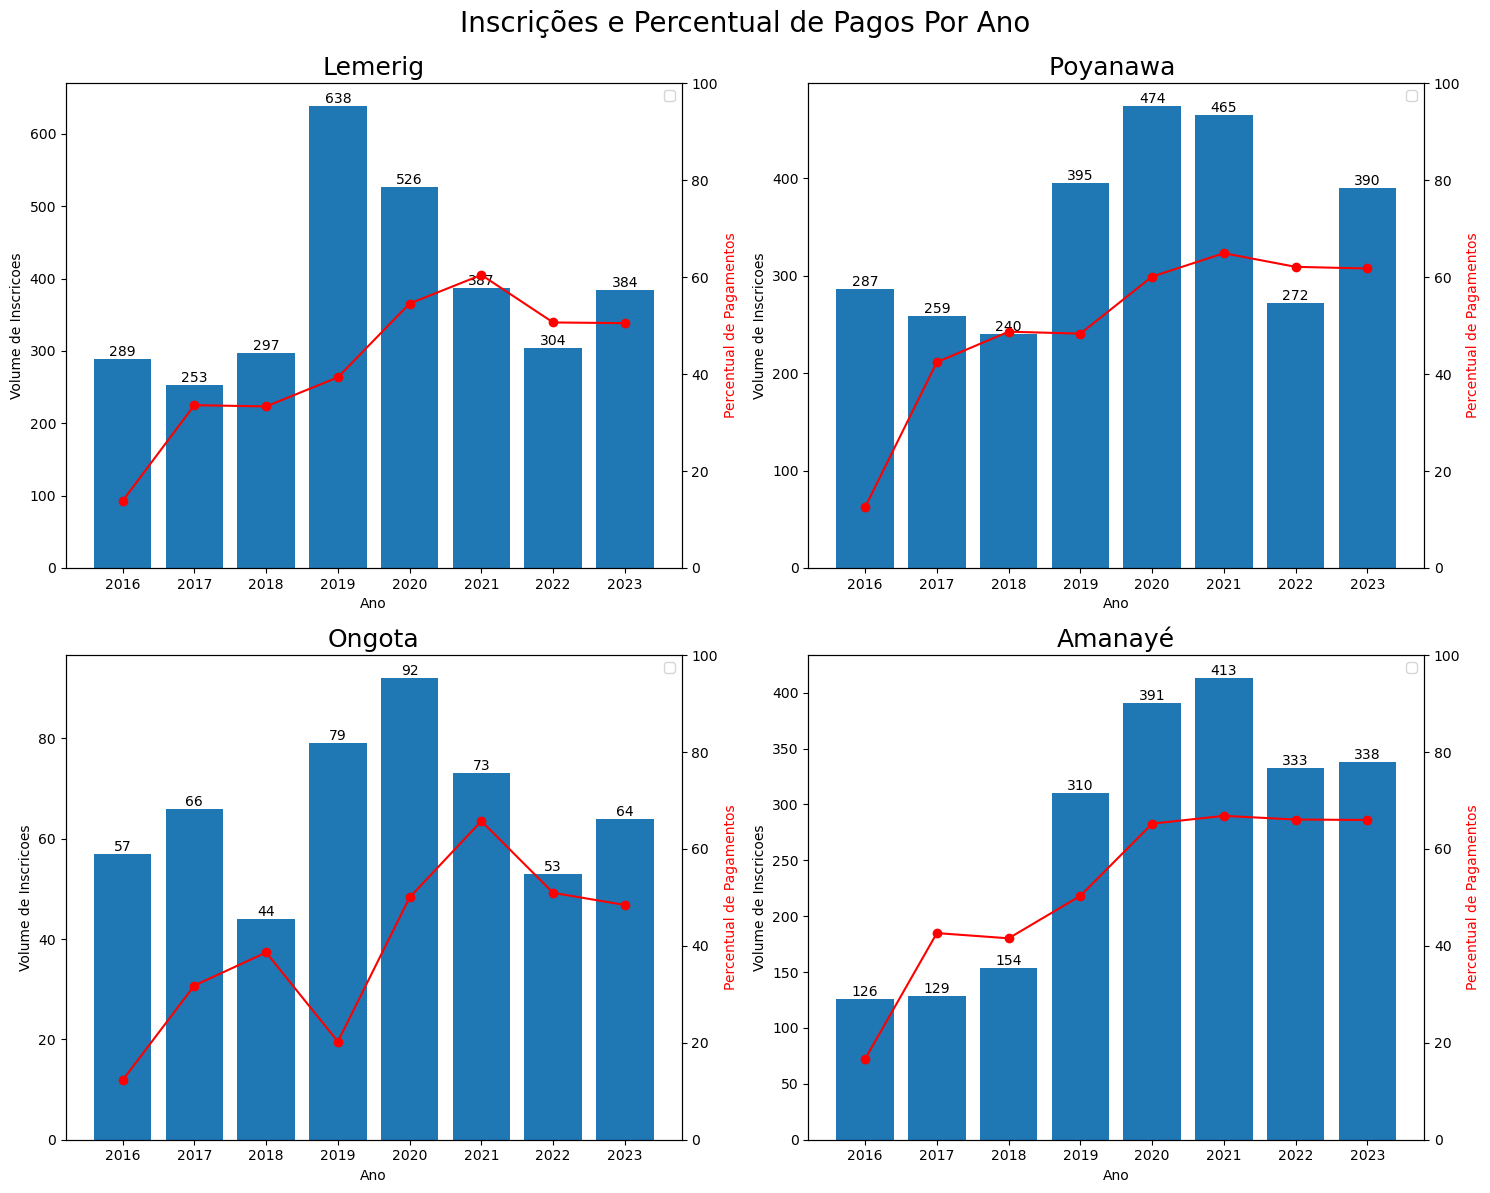

In [32]:

# anos = evolucao_ano['ano_inscricao'].unique()

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.suptitle("Inscrições e Percentual de Pagos Por Ano", fontsize=20, y=0.99)

for idioma, ax in zip(idiomas, axs.ravel()):

    filtro_pagamento = evolucao_ano['foi_pago'] == 'Sim'
    filtro_idioma = evolucao_ano['idioma'] == idioma

    agg_pagas = evolucao_ano[filtro_pagamento & filtro_idioma].groupby(['ano_inscricao'])['foi_pago'].count()
    agg_total = evolucao_ano[filtro_idioma].groupby(['ano_inscricao'])['foi_pago'].count()
    percentual_pagas = (agg_pagas / agg_total) * 100
    
    x_linha = np.arange(len(anos))
    y_linha = percentual_pagas

    ax.bar(anos,agg_total)

    ax2 = ax.twinx()   
    ax2.plot(x_linha, y_linha, marker='o', linestyle='-', color='r')
    ax2.set_ylim(0, 100)

    # Definir rótulos e título
    ax.set_xlabel('Ano')
    ax.set_ylabel('Volume de Inscricoes')
    ax2.set_ylabel('Percentual de Pagamentos', color='r')
    plt.title(idioma, fontsize=18)
    for ano, agg_total in zip(x_linha, agg_total):
        ax.text(ano, agg_total, str(agg_total), ha='center', va='bottom')

    # Adicionar legenda
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2)

plt.tight_layout()
plt.show()

- Ouve uma queda geral no numero de inscrições em dados os idiomas em comparação com 2022
- Com exceçao os cursos de Lemerig, todos tiveram um aumento significativo de inscrições e matriculas durante a pandemia (2020 - 2022)
- As maiores taxas de matricula entao nos cursos de Amanayé e Poyanawa
- O curso de Ongota vem em queda constante no percentual de matricula nos ultimos 3 anos (2021 - 2023), sem aumento no volume de inscrições

## De onde vem as inscrições

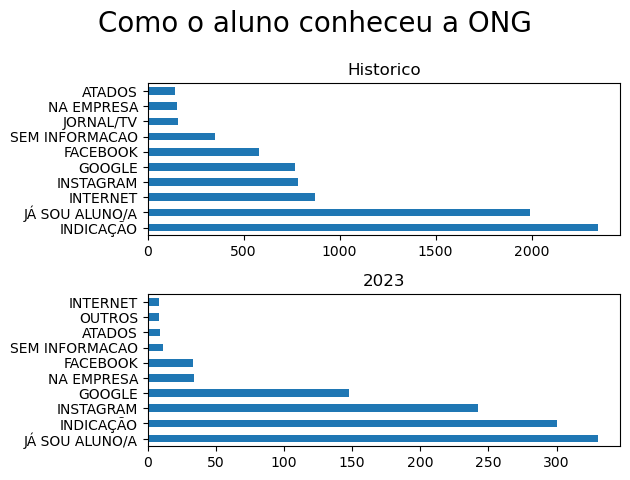

In [33]:
## tratamento do campo de como_conheceu_ong
ajuste_conheceu = df = pd.read_excel("inscricoes_2016-2023.xlsx")

## HISTORICO
fig, axs = plt.subplots(nrows=2, ncols=1)
fig.suptitle("Como o aluno conheceu a ONG", fontsize=20, y=0.99)

historico = (ajuste_conheceu['como_conheceu_ong'].value_counts()).iloc[:10]

historico.plot(kind='barh', title="Historico", ax=axs[0])

## 2023

ajuste_conheceu['ano_inscricao'] = ajuste_conheceu['data_inscricao'].dt.strftime('%Y')

esse_ano = ajuste_conheceu[ajuste_conheceu['ano_inscricao'] == '2023']

top_10 = (esse_ano['como_conheceu_ong'].value_counts()).iloc[:10]

top_10.plot(kind='barh', title="2023", ax=axs[1])

plt.tight_layout()
plt.show()


- Uma parte consideral dessas indicaçoes vem de parentes que já fizeram alguma curso na ONG
- Considerando somente 2023, temos pouca alteraçao em relaçao ao historico, as principais:
    - Já sou aluno/a
    - Indicaçao
    - Instagram
- Temos algumas mençoes de alunos que conheceram a ONG na empresa que trabalham, como IBM, Telefonica etc



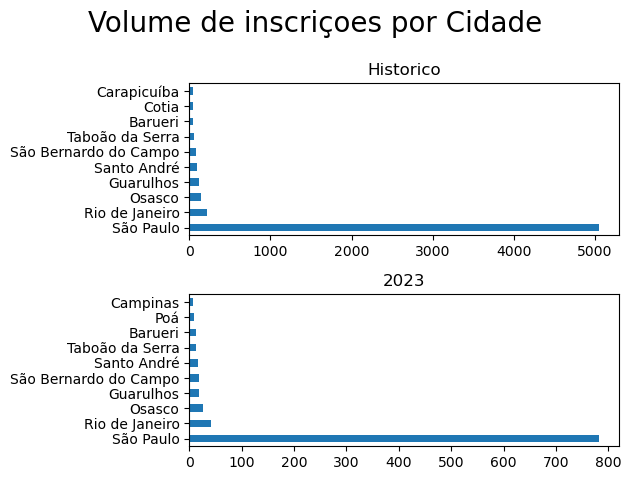

In [34]:
## HISTORICO
fig, axs = plt.subplots(nrows=2, ncols=1)
fig.suptitle("Volume de inscriçoes por Cidade", fontsize=20, y=0.99)

historico = (filtered_df['localidade'].value_counts()).iloc[:10]

historico.plot(kind='barh', title="Historico", ax=axs[0])

## 2023

filtered_df['ano_inscricao'] = filtered_df['data_inscricao'].dt.strftime('%Y')

esse_ano = filtered_df[filtered_df['ano_inscricao'] == '2023']

top_10 = (esse_ano['localidade'].value_counts()).iloc[:10]

top_10.plot(kind='barh', title="2023", ax=axs[1])

plt.tight_layout()
plt.show()


Tanto no historico como em 2023, temos um concentraçao bem grande de inscriçoes vindo de SP Capital

### Volume de inscriçoes por Bairro em SP Capital

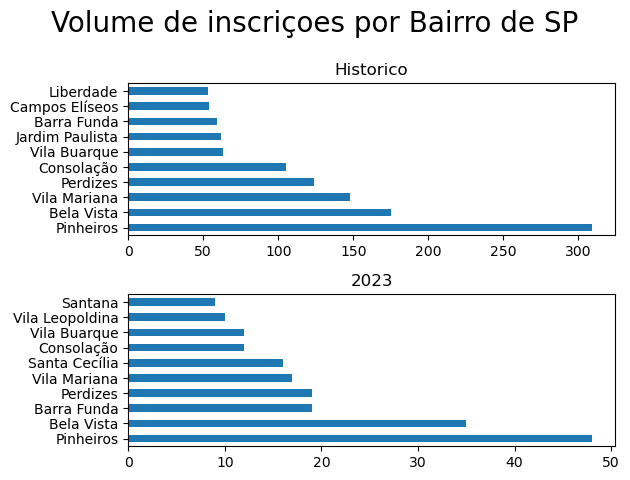

In [35]:

## SP, analise por bairro

fig, axs = plt.subplots(nrows=2, ncols=1)
fig.suptitle("Volume de inscriçoes por Bairro de SP", fontsize=20, y=0.99)

filtered_df['ano_inscricao'] = filtered_df['data_inscricao'].dt.strftime('%Y')

## HISTORICO

historico = filtered_df[filtered_df['localidade'] == 'São Paulo']
historico = (historico['bairro'].value_counts()).iloc[:10]

historico.plot(kind='barh', title="Historico", ax=axs[0])

## 2023
sp_2023 = filtered_df[(filtered_df['ano_inscricao'] == '2023') & (filtered_df['localidade'] == 'São Paulo')]


top_10 = (sp_2023['bairro'].value_counts()).iloc[:10]

top_10.plot(kind='barh', title="2023", ax=axs[1])

plt.tight_layout()
plt.show()


Analisando os bairros, temos poucas alteraçoes entre o historico e 2023. Mais de 90% das inscriçoes estao concentradas no bairro de Pinheiros e Bela Vista (Zone Oeste)

### Volume de inscriçoes por Bairro em RJ Capital

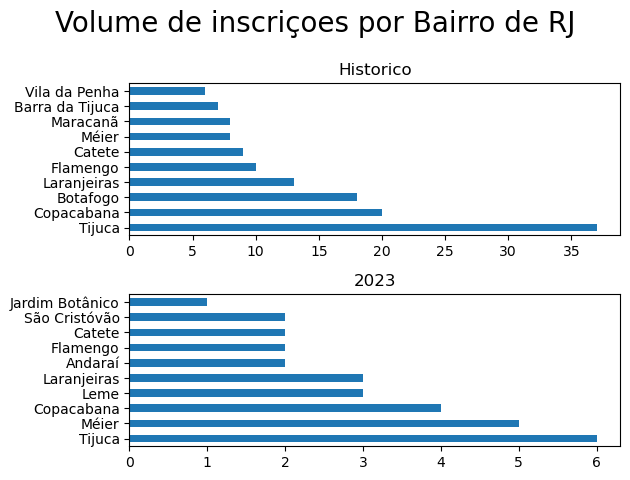

In [36]:
## RJ, analise por bairro

fig, axs = plt.subplots(nrows=2, ncols=1)
fig.suptitle("Volume de inscriçoes por Bairro de RJ", fontsize=20, y=0.99)

filtered_df['ano_inscricao'] = filtered_df['data_inscricao'].dt.strftime('%Y')

## HISTORICO

historico = filtered_df[filtered_df['localidade'] == 'Rio de Janeiro']
historico = (historico['bairro'].value_counts()).iloc[:10]

historico.plot(kind='barh', title="Historico", ax=axs[0])

## 2023
rj_2023 = filtered_df[(filtered_df['ano_inscricao'] == '2023') & (filtered_df['localidade'] == 'Rio de Janeiro')]


top_10 = (rj_2023['bairro'].value_counts()).iloc[:10]

top_10.plot(kind='barh', title="2023", ax=axs[1])

plt.tight_layout()
plt.show()


## Taxa de Retenção de Alunos de um Semestre/Ano para o Outro
Para a media de matriculas por curso, estou considerando o numero de vezes que o aluno se matriculou no mesmo idioma e fez o pagamento.


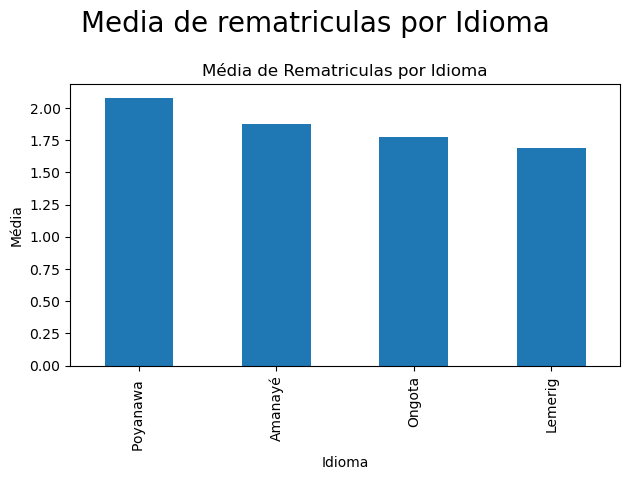

In [37]:

filtro_duplicados = filtered_df['identificado_aluno'].duplicated(keep=False)
filtro_zero = filtered_df['identificado_aluno'] != 0 
filtro_pagamento = filtered_df['foi_pago'] == 'Sim'

retencao = filtered_df[filtro_duplicados & filtro_zero & filtro_pagamento]
contagem_retornos = retencao.groupby(['identificado_aluno','idioma']).size().reset_index(name='Média de Rematriculas')


fig, axs = plt.subplots(nrows=1, ncols=1)
fig.suptitle("Media de rematriculas por Idioma", fontsize=20, y=0.99)


media_ano = contagem_retornos.groupby(['idioma']).mean().sort_values(
    by='Média de Rematriculas',ascending=False)

media_ano.plot(kind='bar', title="Média de Rematriculas por Idioma",legend=False,
        xlabel="Idioma",
        ylabel="Média", ax=axs)

plt.tight_layout()
plt.show()

Considerando todo o historico, as turmas de Poyanawa tem uma maior chance de de rematriculas com uma média de 2 matriculas, seguido pelo curso de Amanayé, 1,81 e AraOngotabe com 1.75.

Lemerig tem o maior volume de inscriçoes, porém tem a menor media de rematriculas.

## Reunir todas as informações em um mesmo lugar, para acessarmos com mais facilidade 

Depois de analisar a base tenho algumas sugestoes:

- Contrataçao de um CRM ou utilizaçao de uma gratuito, facilitando o processo de contato do aluno, liberaçao das apostilas etc.

- Reformulaçao do formulario de inscriçoes colocando algumas informaçoes como:

    - Data de nascimento / Faixa de Idade

    - Motivaçao para fazer o curso

    - Separaçao entre aula avulsa, intensivo etc.

    - Sexo

- Unificaçao dos formularios, facilidando futuras analises etc

- Validaçao de dados dentro do formulario (cpf, cep etc)
